In [1]:
import numpy as np
import matplotlib.pyplot as plt

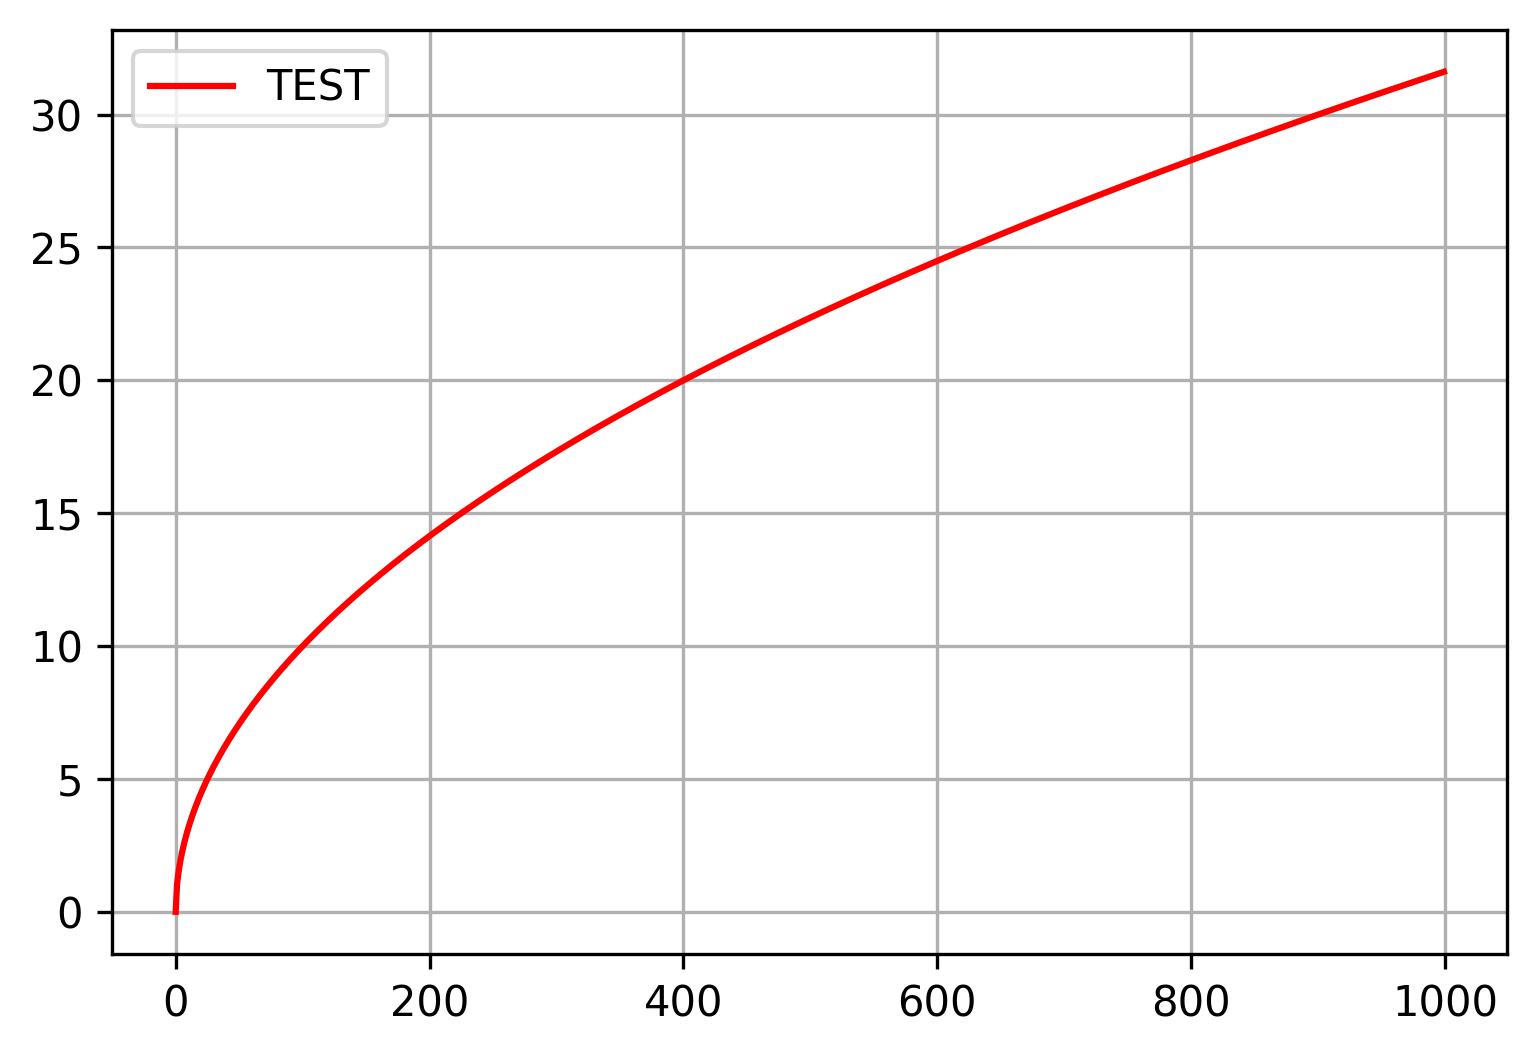

In [2]:
X = np.arange(0, 1000, 1)
Y = np.sqrt(X)

plt.figure(figsize=(6,4), dpi=300)
plt.plot(X, Y, 'r-', label="TEST")
plt.grid('minor')
plt.legend()


In [3]:
def plotasy(fig, axs, data, N, Nprew, i, j):

    color1 = "#ee4035"
    color3 = "#f37736"
    color4 = "#7bc043"
    color2 = "#0392cf"
    x=data[Nprew + 3*N:Nprew + 4*N,0]
    y=data[Nprew + 3*N:Nprew + 4*N,1]
    bound = np.max(np.abs([x.min(), x.max(), y.min(), y.max()]))
    axs[i, j].plot(data[Nprew + 3*N:Nprew + 4*N,0], data[Nprew + 3*N:Nprew + 4*N,1], 'o', markeredgecolor=color1, markerfacecolor=color1, markersize=1.8, alpha=0.8, label="t = 100.0")
    axs[i, j].plot(data[Nprew + 2*N:Nprew + 3*N,0], data[Nprew + 2*N:Nprew + 3*N,1], 'o', markeredgecolor=color2, markerfacecolor=color2, markersize=1.8, alpha=0.8, label="t = 10.0")
    axs[i, j].plot(data[Nprew + N:Nprew + 2*N,0], data[Nprew + N:Nprew + 2*N,1], 'o', markeredgecolor=color3, markerfacecolor=color3, markersize=1.8, alpha=0.8, label="t = 1.0")
    axs[i, j].plot(data[Nprew + 0:Nprew + N,0], data[Nprew + 0:Nprew + N,1], 'o', markeredgecolor=color4, markerfacecolor=color4, markersize=1.8, alpha=0.8, label="t = 0.1")
    axs[i, j].grid(True)
    axs[i,j].set_ylim(-bound, bound)
    axs[i,j].set_xlim(-bound, bound)
    axs[i, j].set_title(str(N) + " cząsteczek", fontsize=20)
    axs[i, j].set_xlabel("Współrzędna X", fontsize=16)
    axs[i, j].set_ylabel("Współrzędna Y", fontsize=16)
    axs[i, j].legend(markerscale=3, fontsize=12, loc='upper left')

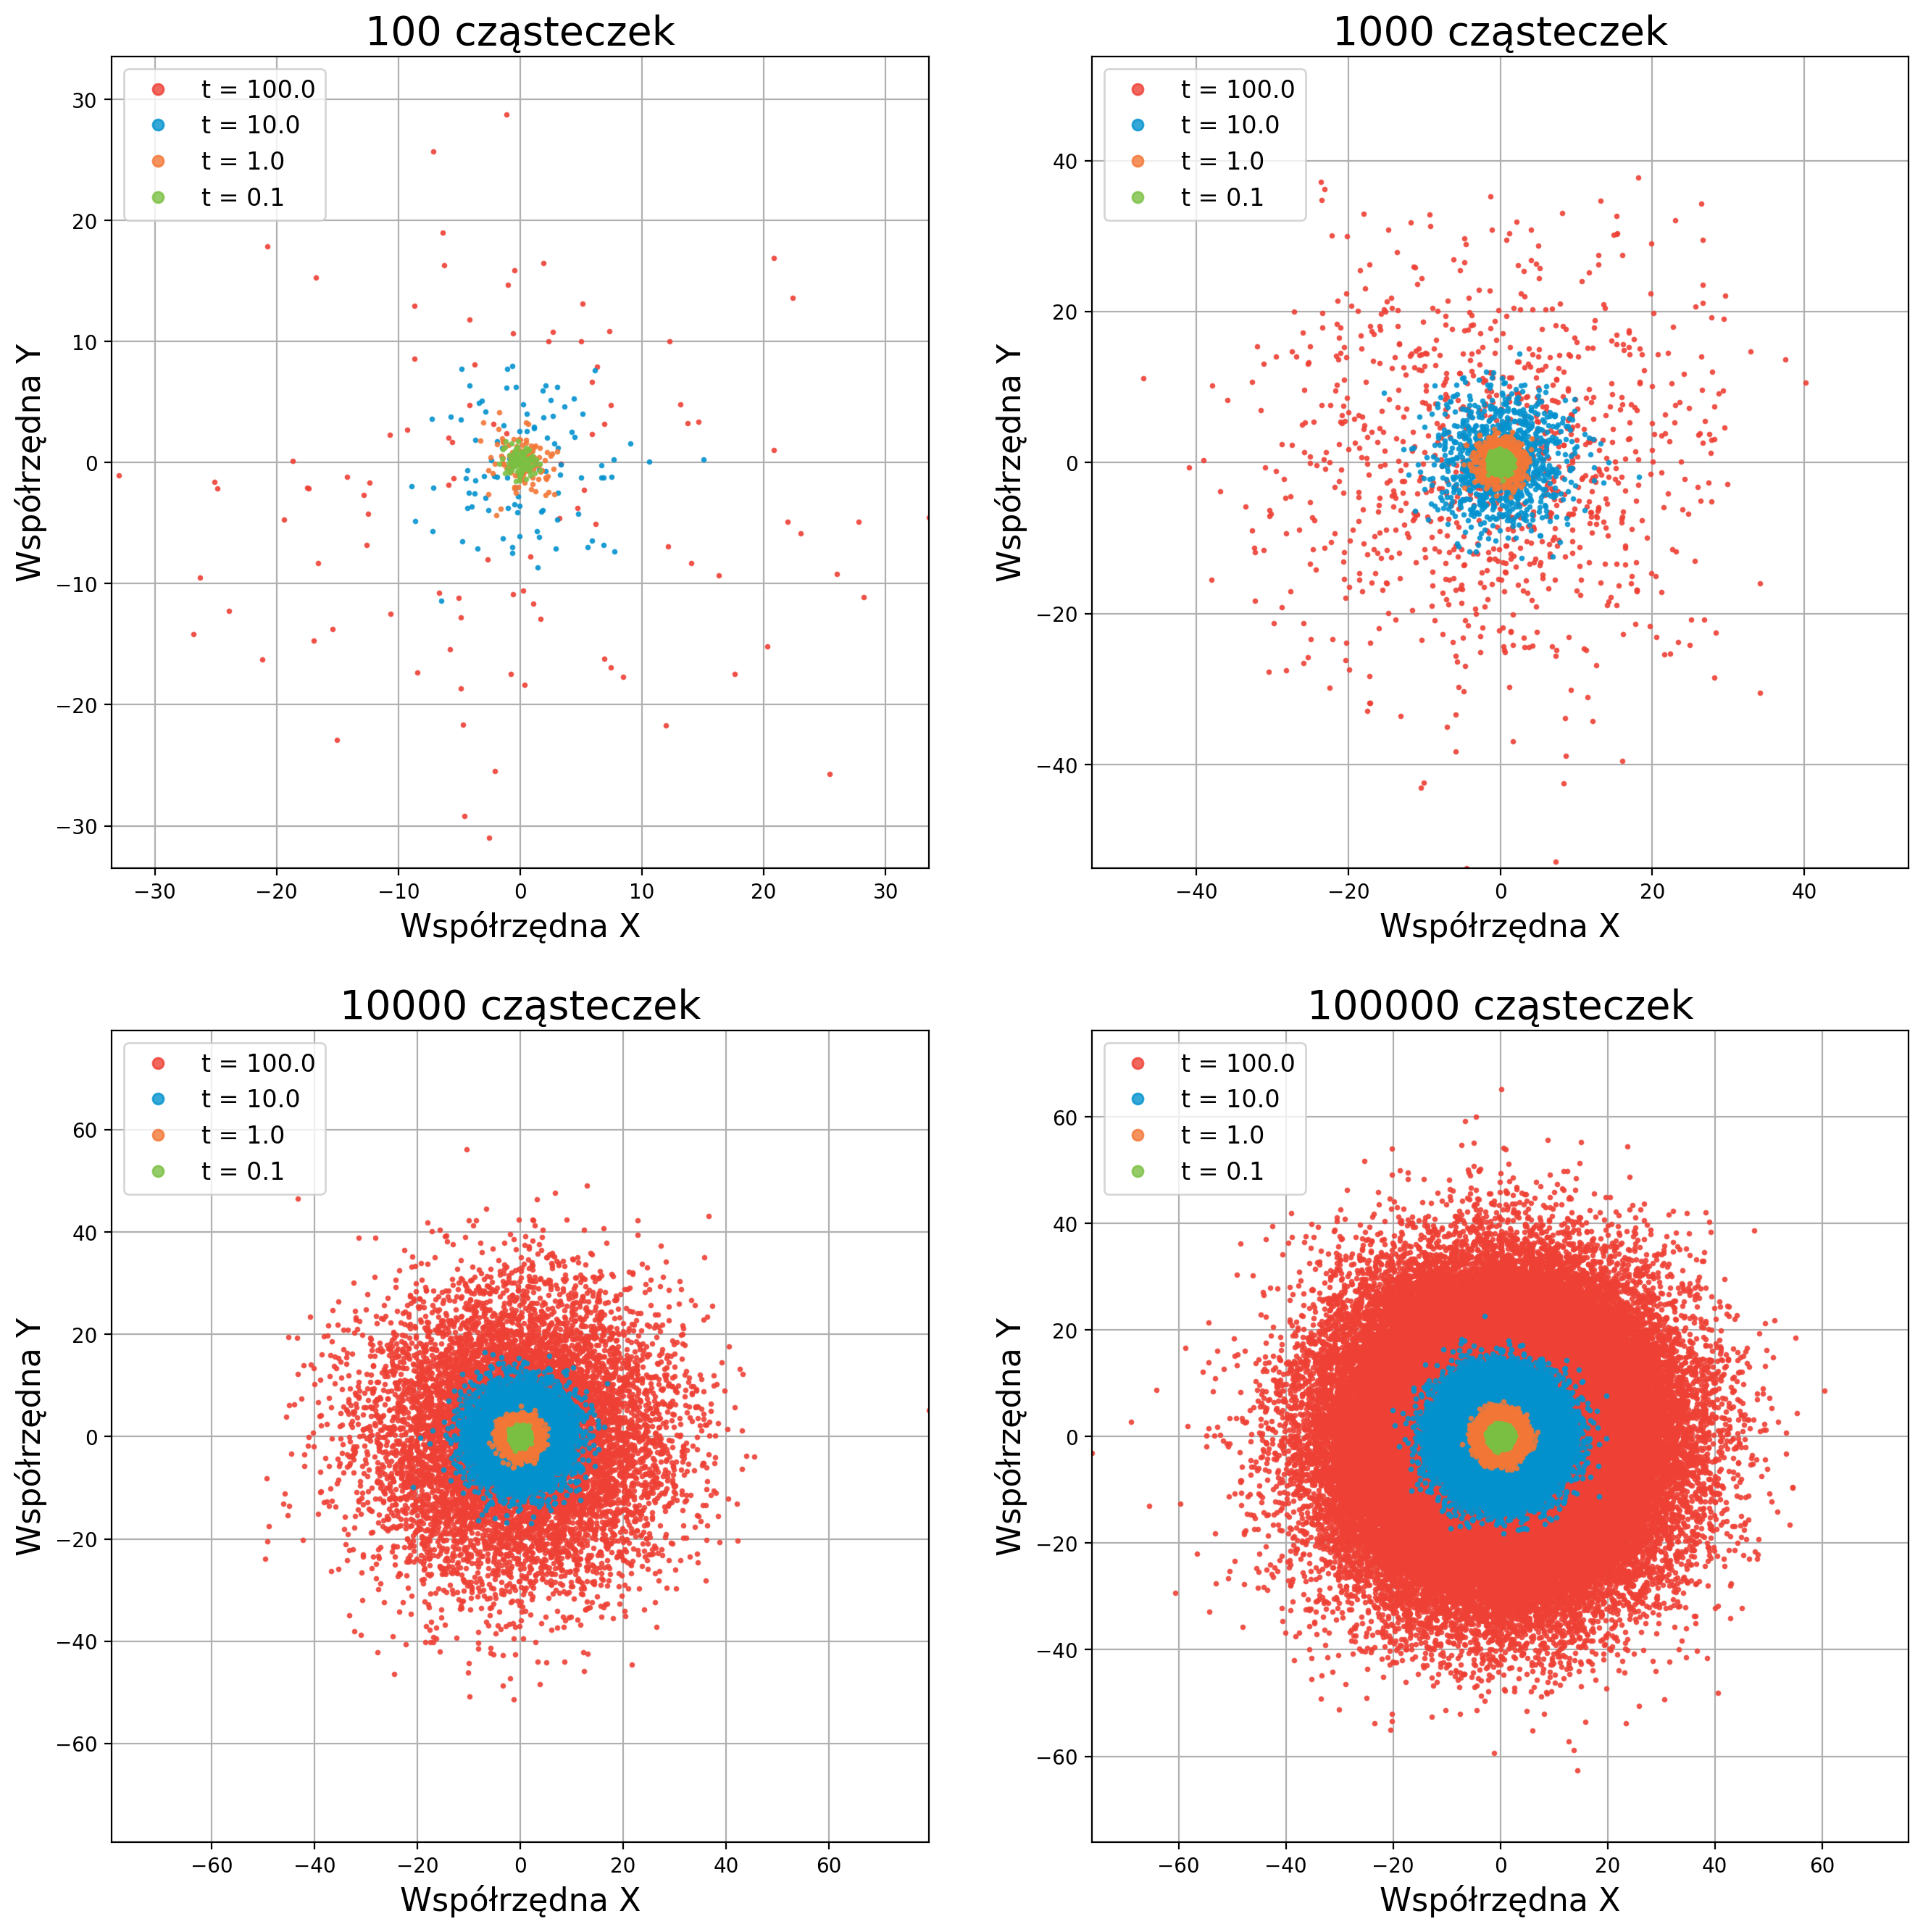

In [4]:
positions = np.loadtxt("wiener_pos.dat", comments="#", delimiter=" ", unpack=False)

Ns = np.array([0, 10**2, 10**3, 10**4, 10**5]) #
Nprew = 0
N = 0
fig, axs = plt.subplots(2, 2, figsize=(16,16), dpi=200)
for i in range(2):
    for j in range(2):
        Nprew += Ns[N]*4
        plotasy(fig, axs, positions, Ns[N+1], Nprew, i, j)
        N+=1
plt.show()

In [40]:
def plotasy_stat(fig, axs, data, N, i, Ns, ax1, ax2):
    x = data[0+N*i:N+N*i,1]
    d1 = data[0+N*i:N+N*i,5]
    sdt_d1 = data[0+N*i:N+N*i,8]
    d2 = data[0+N*i:N+N*i,6]
    sdt_d2 = data[0+N*i:N+N*i,9]
    d3 = data[0+N*i:N+N*i,7]
    sdt_d3 = data[0+N*i:N+N*i,10]

    axs[ax1, ax2].plot(x, d1, '-', linewidth=2.5, color='tab:orange', label=r"D$_{\text{XX}}$")
    axs[ax1, ax2].fill_between(x, d1-sdt_d1, d1+sdt_d1, alpha=0.5, facecolor='tab:orange')

    axs[ax1, ax2].plot(x, d2, '-', linewidth=2.5, color='tab:blue' , label=r"D$_{\text{YY}}$")
    axs[ax1, ax2].fill_between(x, d2-sdt_d1, d2+sdt_d2, alpha=0.5, facecolor='tab:blue')

    axs[ax1, ax2].plot(x, d3, '-', linewidth=2.5, color='tab:green' , label=r"D$_{\text{XY}}$")
    axs[ax1, ax2].fill_between(x, d3-sdt_d3, d3+sdt_d3, alpha=0.5, facecolor='tab:green')

    axs[ax1, ax2].grid(True)
    axs[ax1, ax2].set_title(str(Ns) + " cząsteczek", fontsize=20)
    axs[ax1, ax2].set_xlabel("Czas [s]", fontsize=20)
    axs[ax1, ax2].set_ylabel(r'Wartość wspł. dyfuzji [$m^2\cdot s^{-1}$]', fontsize=20)
    axs[ax1, ax2].legend(markerscale=12, fontsize=12, loc='center right')
    axs[ax1, ax2].set_xlim([0,100])

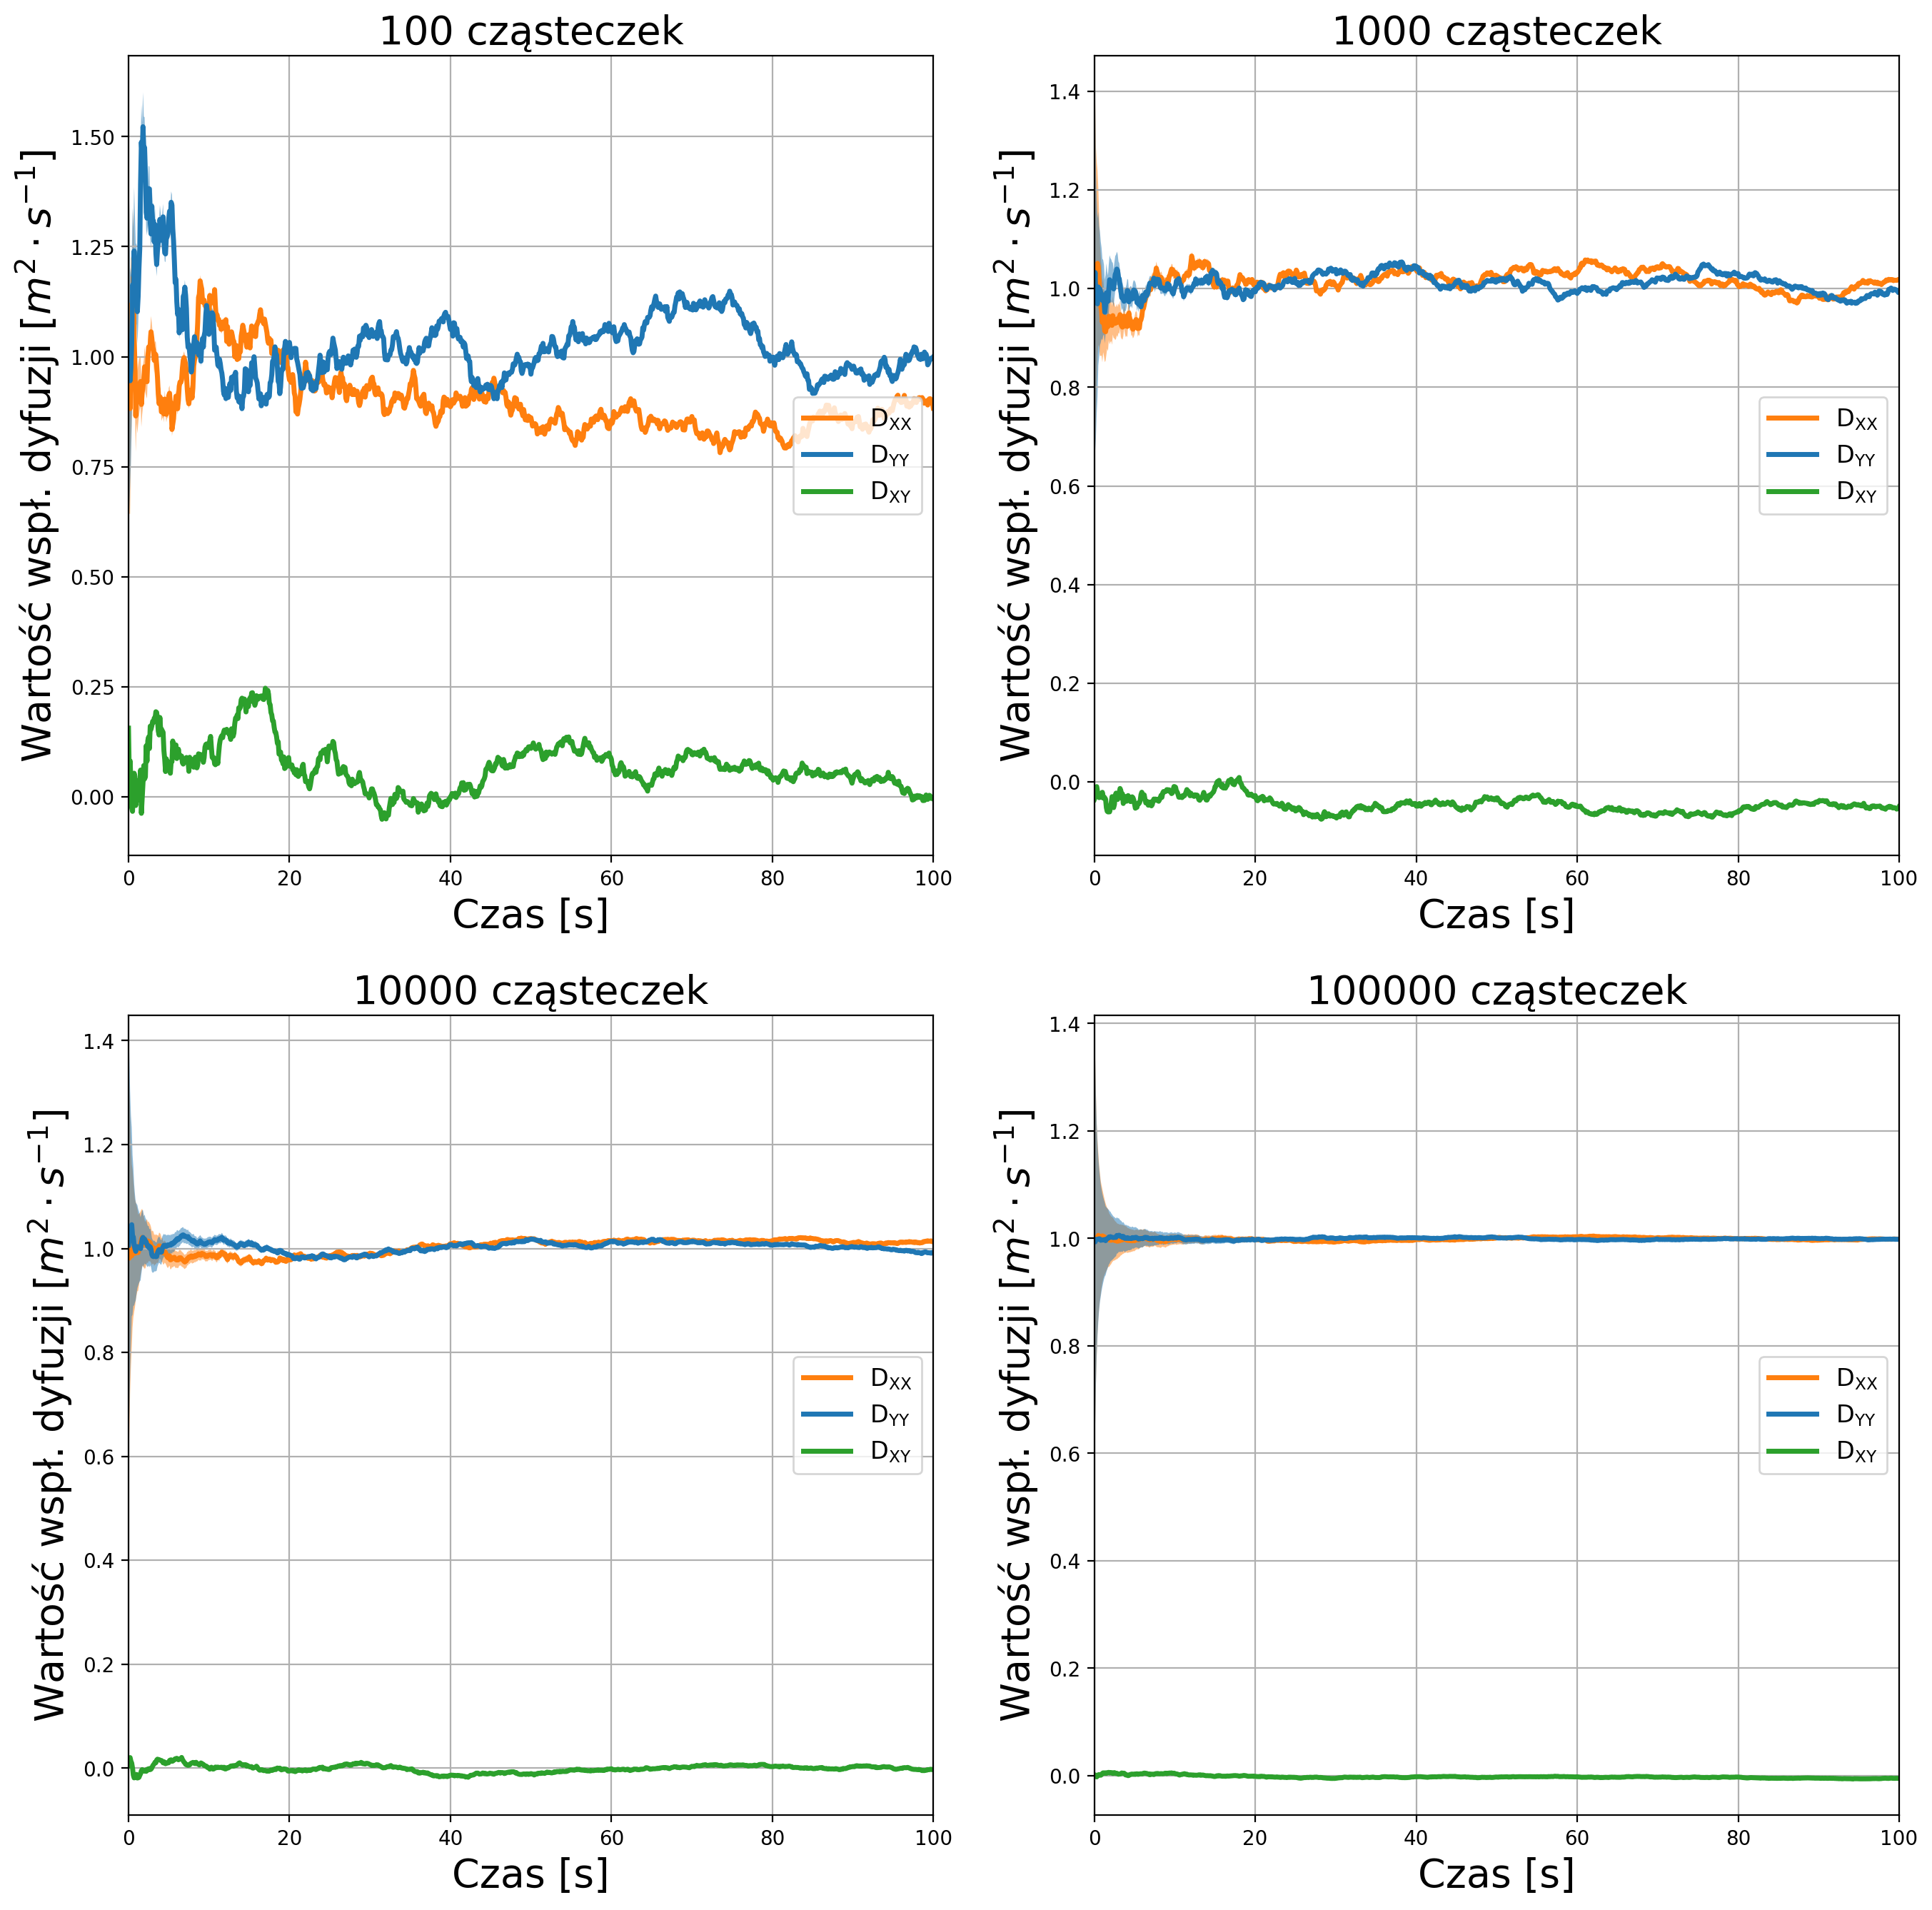

In [41]:
stat = np.loadtxt("wiener_stat.dat", comments="#", delimiter=" ", unpack=False, skiprows=1)
# print(stat)

Ns = np.array([10**2, 10**3, 10**4, 10**5]) #
fig, axs = plt.subplots(2, 2, figsize=(16,16), dpi=200)

i=0
for ax1 in range(2):
    for ax2 in range(2):
        plotasy_stat(fig, axs, stat, 1001, i, Ns[i], ax1, ax2)
        i+=1
plt.show()

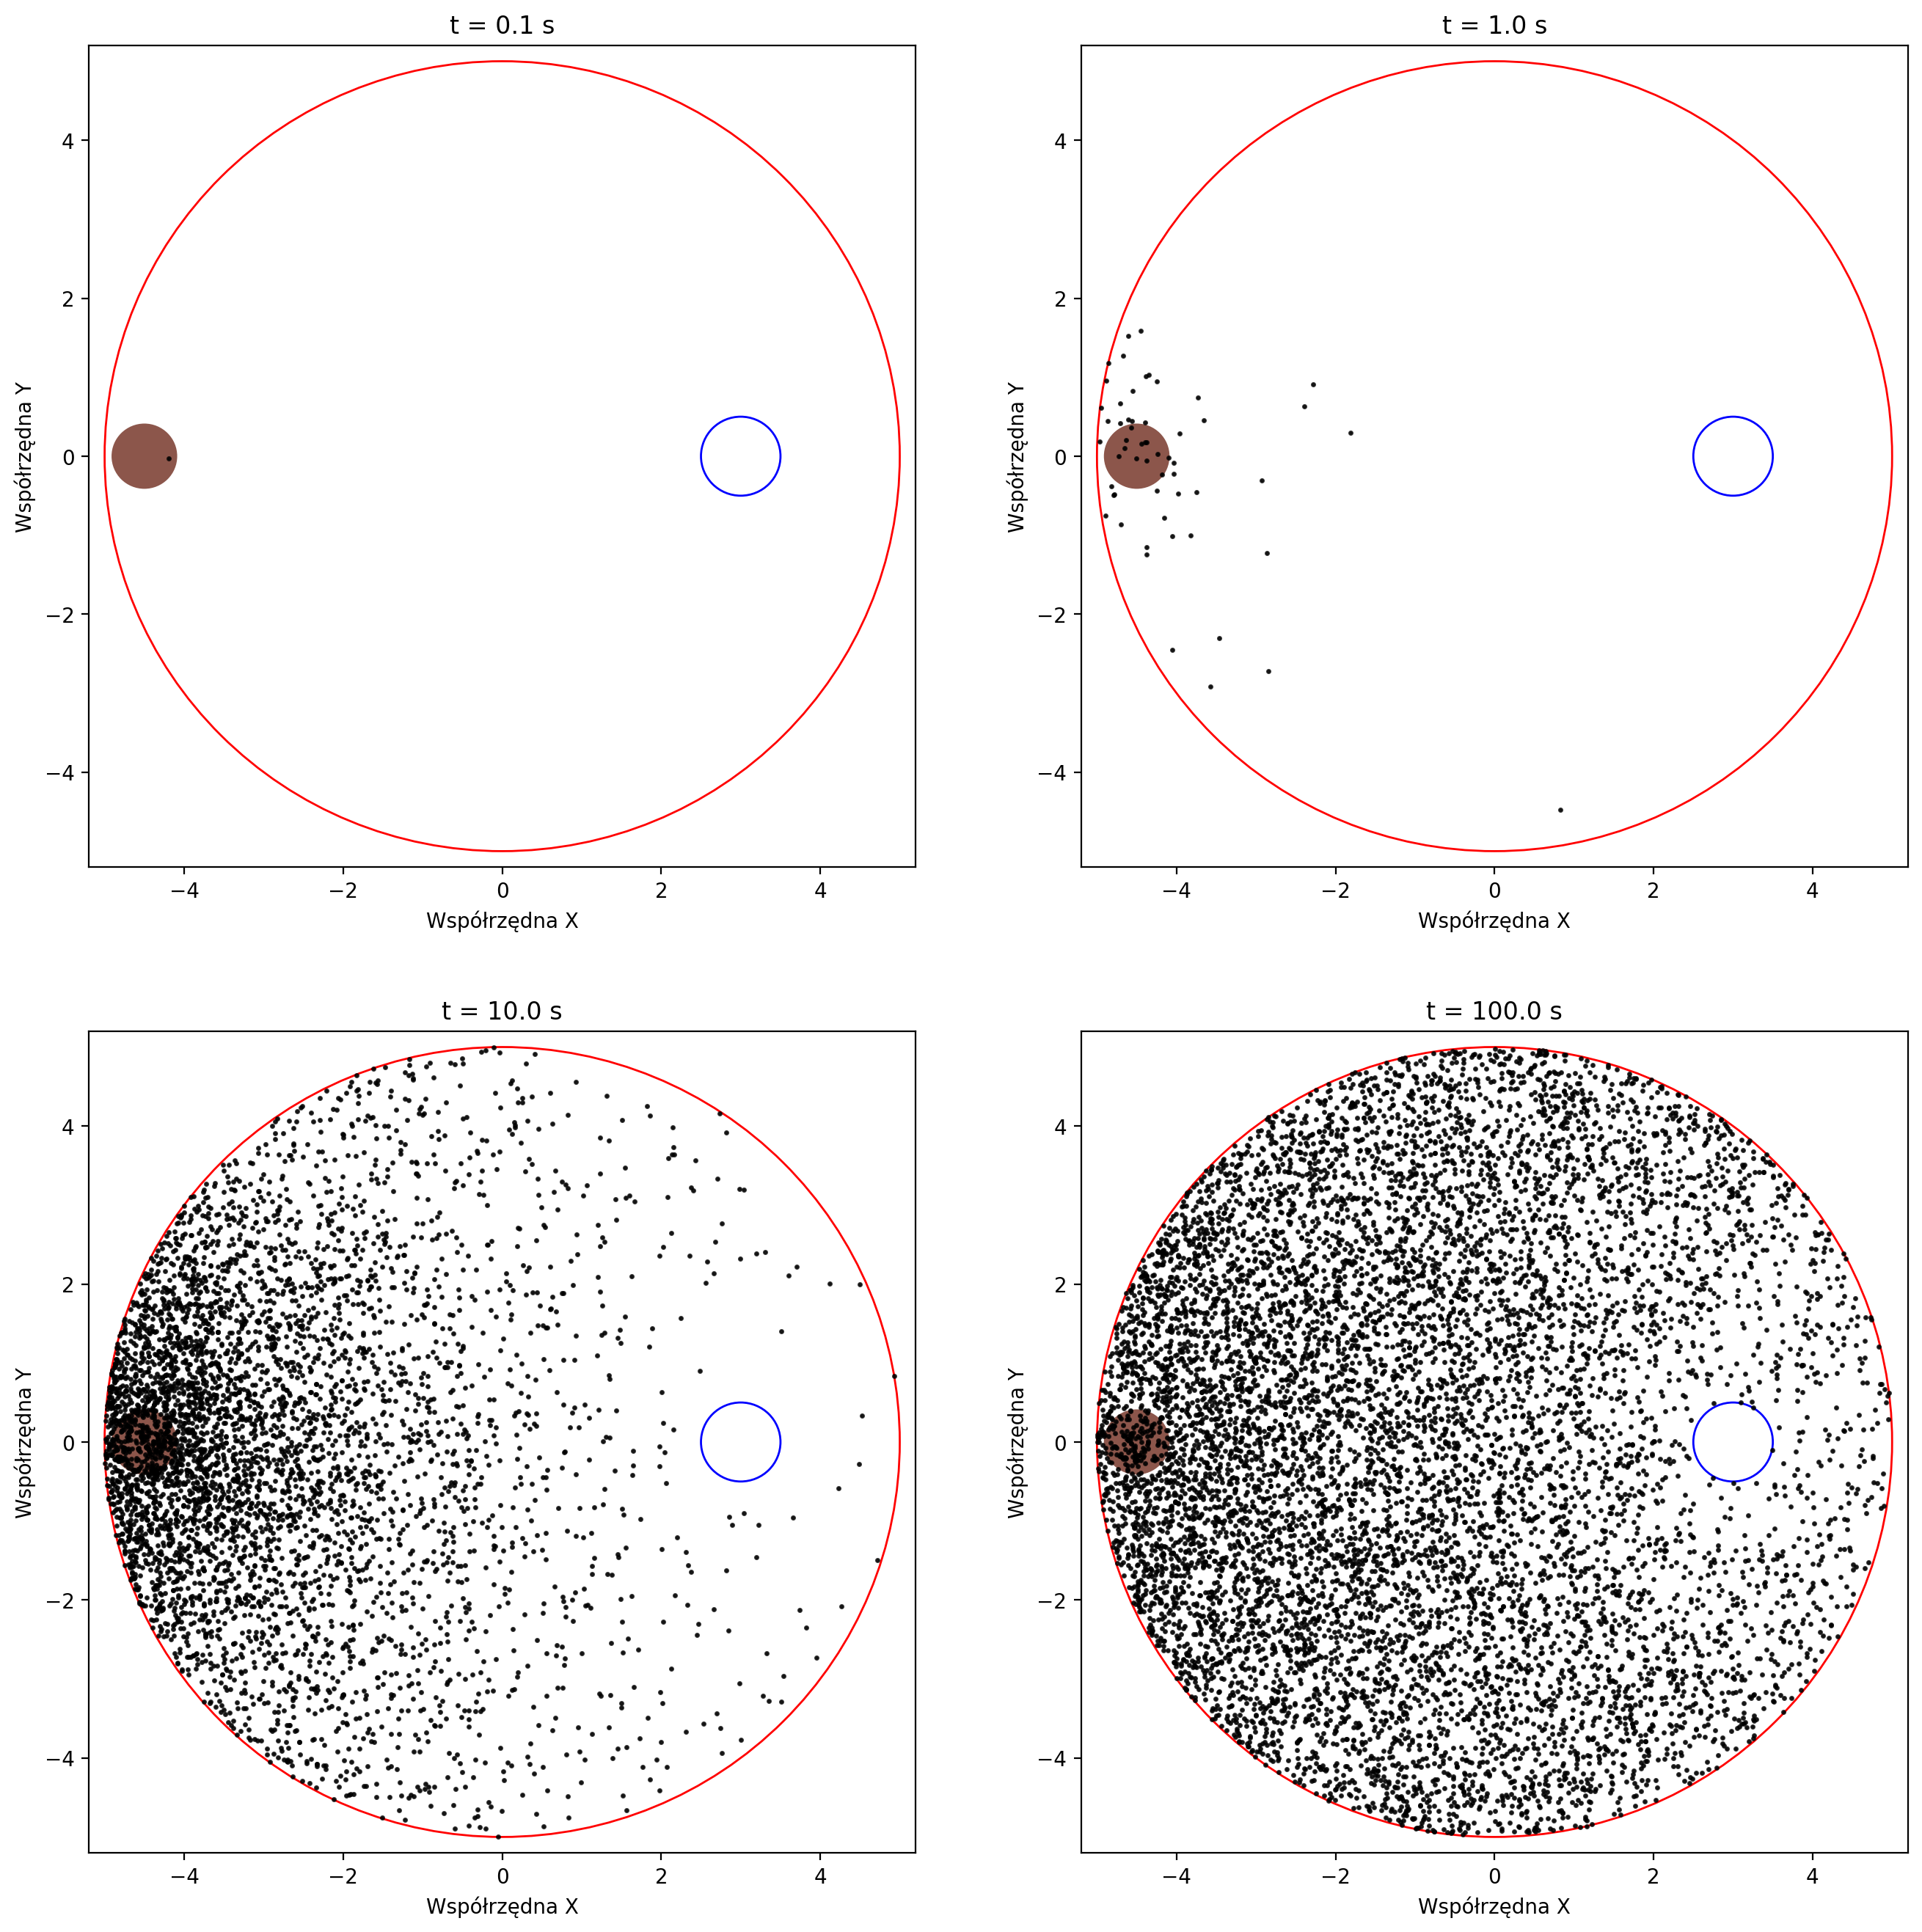

<Figure size 400x400 with 0 Axes>

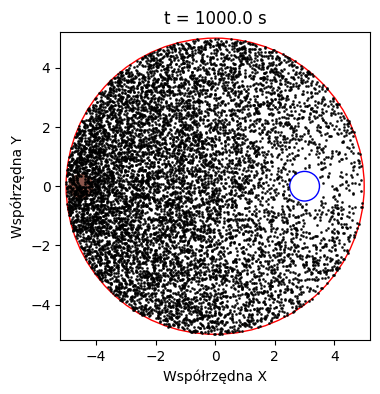

In [7]:
data = np.loadtxt("omega0_Ra_1_pos.dat", comments="#", delimiter=" ", unpack=False)

for i in range(len(data)):
    if data[i][2] == 0:
        data[i][0] = None
        data[i][1] = None

color1 = "#ee4035"
color3 = "#f37736"
color4 = "#7bc043"
color2 = "#0392cf"

color4 = "k"
color1 = color4
color2 = color4
color3 = color4

N = 10001
Nprew = 0

Ra = 0.5

fig, axs = plt.subplots(2, 2, figsize=(16,16), dpi=200)


axs[0,0].plot(data[Nprew + 0:Nprew + N,0], data[Nprew + 0:Nprew + N,1], 'o', markeredgecolor=color4, markerfacecolor=color4, markersize=1.5, alpha=0.8, label="t = 0.1")
circle1 = plt.Circle((0, 0), 5, color='r', fill=False)
axs[0,0].add_patch(circle1)
circle2 = plt.Circle((-4.5, 0), 0.4, color='tab:brown', fill=True)
axs[0,0].add_patch(circle2)
circle3 = plt.Circle((3, 0), Ra, color='b', fill=False)
axs[0,0].add_patch(circle3)
axs[0,0].set_title("t = 0.1 s")
axs[0,0].set_xlabel("Współrzędna X")
axs[0,0].set_ylabel("Współrzędna Y")
axs[0,0].set_xlim([-5.2,5.2])
axs[0,0].set_ylim([-5.2,5.2])


axs[0,1].plot(data[Nprew + N:Nprew + 2*N,0], data[Nprew + N:Nprew + 2*N,1], 'o', markeredgecolor=color3, markerfacecolor=color3, markersize=1.5, alpha=0.8, label="t = 1.0")
circle1 = plt.Circle((0, 0), 5, color='r', fill=False)
axs[0,1].add_patch(circle1)
circle2 = plt.Circle((-4.5, 0), 0.4, color='tab:brown', fill=True)
axs[0,1].add_patch(circle2)
circle3 = plt.Circle((3, 0), Ra, color='b', fill=False)
axs[0,1].add_patch(circle3)
axs[0,1].set_title("t = 1.0 s")
axs[0,1].set_xlabel("Współrzędna X")
axs[0,1].set_ylabel("Współrzędna Y")
axs[0,1].set_xlim([-5.2,5.2])
axs[0,1].set_ylim([-5.2,5.2])


axs[1,0].plot(data[Nprew + 2*N:Nprew + 3*N,0], data[Nprew + 2*N:Nprew + 3*N,1], 'o', markeredgecolor=color2, markerfacecolor=color2, markersize=1.5, alpha=0.8, label="t = 10.0")
circle1 = plt.Circle((0, 0), 5, color='r', fill=False)
axs[1,0].add_patch(circle1)
circle2 = plt.Circle((-4.5, 0), 0.4, color='tab:brown', fill=True)
axs[1,0].add_patch(circle2)
circle3 = plt.Circle((3, 0), Ra, color='b', fill=False)
axs[1,0].add_patch(circle3)
axs[1,0].set_title("t = 10.0 s")
axs[1,0].set_xlabel("Współrzędna X")
axs[1,0].set_ylabel("Współrzędna Y")
axs[1,0].set_xlim([-5.2,5.2])
axs[1,0].set_ylim([-5.2,5.2])


axs[1,1].plot(data[Nprew + 3*N:Nprew + 4*N,0], data[Nprew + 3*N:Nprew + 4*N,1], 'o', markeredgecolor=color1, markerfacecolor=color1, markersize=1.5, alpha=0.8, label="t = 100.0")
circle1 = plt.Circle((0, 0), 5, color='r', fill=False)
axs[1,1].add_patch(circle1)
circle2 = plt.Circle((-4.5, 0), 0.4, color='tab:brown', fill=True)
axs[1,1].add_patch(circle2)
circle3 = plt.Circle((3, 0), Ra, color='b', fill=False)
axs[1,1].add_patch(circle3)
axs[1,1].set_title("t = 100.0 s")
axs[1,1].set_xlabel("Współrzędna X")
axs[1,1].set_ylabel("Współrzędna Y")
axs[1,1].set_xlim([-5.2,5.2])
axs[1,1].set_ylim([-5.2,5.2])

plt.show()

plt.figure(figsize=(4,4), dpi=100)
plt.figure(figsize=(4,4), dpi=100)
plt.plot(data[Nprew + 4*N:Nprew + 5*N,0], data[Nprew + 4*N:Nprew + 5*N,1], 'o', markeredgecolor=color1, markerfacecolor=color1, markersize=1.0, alpha=0.8)
circle1 = plt.Circle((0, 0), 5, color='r', fill=False)
plt.gca().add_patch(circle1)
circle2 = plt.Circle((-4.5, 0), 0.4, color='tab:brown', fill=True)
plt.gca().add_patch(circle2)
circle3 = plt.Circle((3, 0), Ra, color='b', fill=False)
plt.gca().add_patch(circle3)
plt.title("t = 1000.0 s")
plt.xlabel("Współrzędna X")
plt.ylabel("Współrzędna Y")
plt.xlim([-5.2,5.2])
plt.ylim([-5.2,5.2])
plt.show()

[[ 1.00000e+04  1.00000e-01 -8.61200e-03 ...  1.85886e-03 -4.41421e-03
   2.00000e+01]
 [ 1.00000e+04  2.00000e-01 -1.27495e-02 ...  2.27987e-03 -2.40103e-03
   3.00000e+01]
 [ 1.00000e+04  3.00000e-01 -1.68013e-02 ...  2.90874e-03 -2.24839e-04
   4.00000e+01]
 ...
 [ 1.00000e+04  9.99700e+02 -5.10134e-01 ...  1.60049e-03 -1.09188e-05
   5.01500e+03]
 [ 1.00000e+04  9.99800e+02 -5.14933e-01 ...  1.58421e-03 -1.13127e-05
   5.01500e+03]
 [ 1.00000e+04  9.99900e+02 -5.18365e-01 ...  1.58379e-03 -1.45983e-05
   5.01100e+03]]


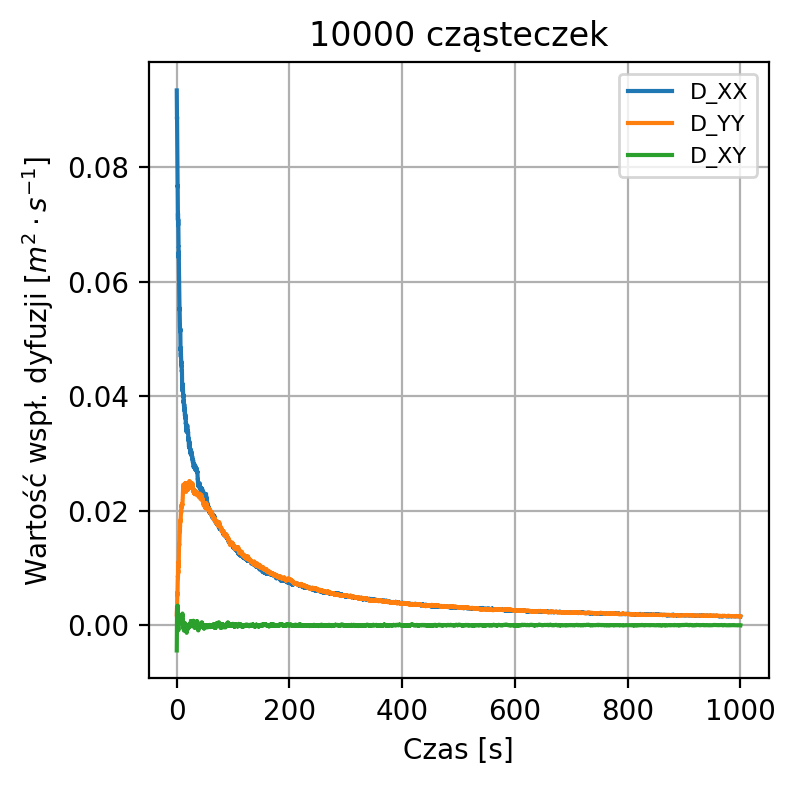

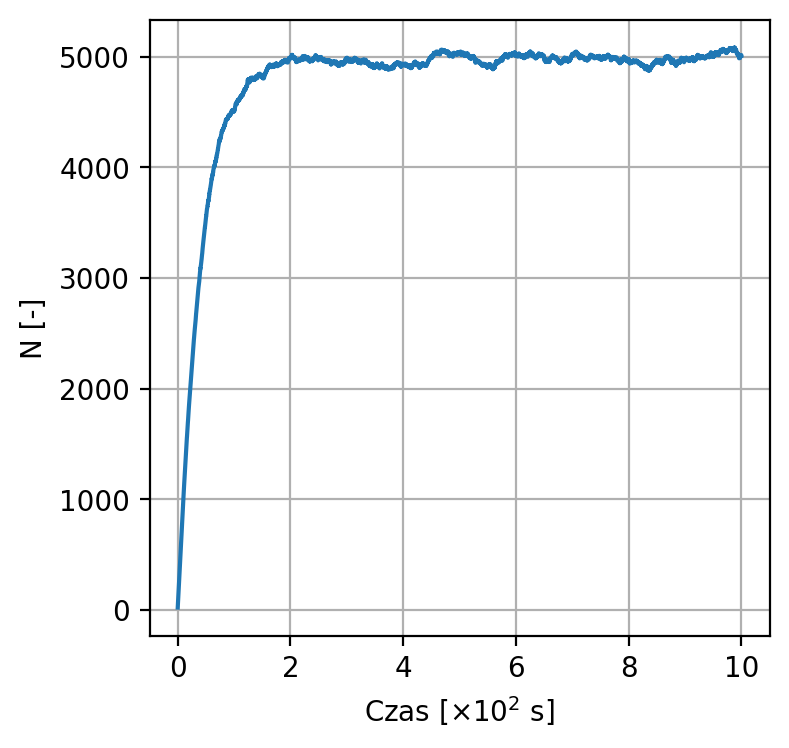

In [11]:
stat = np.loadtxt("omega0_Ra_0_stat.dat", comments="#", delimiter=" ", unpack=False, skiprows=1)

print(stat)

N = 10000

plt.figure(figsize=(4,4), dpi=200)
plt.plot(stat[0:N,1], stat[0:N,5], '-', label="D_XX")
plt.plot(stat[0:N,1], stat[0:N,6], '-', label="D_YY")
plt.plot(stat[0:N,1], stat[0:N,7], '-', label="D_XY")
plt.grid(True)
plt.title(str(N) + " cząsteczek")
plt.xlabel("Czas [s]")
plt.ylabel(r'Wartość wspł. dyfuzji [$m^2\cdot s^{-1}$]')
plt.legend(markerscale=8, fontsize=8, loc='upper right')
plt.show()

plt.figure(figsize=(4,4), dpi=200)
plt.plot(stat[0:N,1]/100, stat[0:N,8], '-')
plt.ylabel("N [-]")
plt.xlabel(r'Czas [$\times 10^{2}$ s]')
plt.grid(True)
plt.show()